In [41]:
import networkx as nx
# import ndlib
import ndlib.models.epidemics as ep
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
print(nx.__version__)

3.4.1


In [65]:
def calculate_node_sizes(network):
    node_sizes = Counter(list(network.nodes()))
    for edge in network.edges:
        node_sizes[edge[0]] += 10
        node_sizes[edge[1]] += 10
    return [value for value in node_sizes.values()]


def layout_graph_spring(network):
    layout = nx.spring_layout(network)
    node_sizes = calculate_node_sizes(network)
    return {"pos": layout, "node_size": node_sizes}
    
def plot_graph_spring(network):
    ax = plt.figure(figsize=(10, 10)).add_subplot()
    nx.draw(network, width=0.5, ax=ax, **layout_graph_spring(network))


def layout_graph_spectral(network):
    layout = nx.spring_layout(network)
    node_sizes = calculate_node_sizes(network)
    return {"pos": layout, "node_size": node_sizes}

def plot_graph_spectral(network):
    ax = plt.figure(figsize=(10, 10)).add_subplot()
    nx.draw(network, width=0.5, ax=ax, **layout_graph_spectral(network))


def layout_graph_random(network):
    layout = nx.random_layout(network)
    node_sizes = calculate_node_sizes(network)
    return {"pos": layout, "node_size": node_sizes}

def plot_graph_random(network):
    ax = plt.figure(figsize=(10, 10)).add_subplot()
    nx.draw(network, width=0.5, ax=ax, **layout_graph_random(network))


def layout_graph_forceatlas(network):
    layout = nx.forceatlas2_layout(network, dissuade_hubs=True, strong_gravity=True, max_iter=100)
    node_sizes = calculate_node_sizes(network)
    print(len(node_sizes))
    return {"pos": layout, "node_size": node_sizes}

def plot_graph_forceatlas(network):
    ax = plt.figure(figsize=(15, 15)).add_subplot()
    nx.draw(network, width=0.5, ax=ax, **layout_graph_forceatlas(network))


def layout_graph_kk(network):
    layout = nx.kamada_kawai_layout(network, weight=None)
    node_sizes = calculate_node_sizes(network)
    return {"pos": layout, "node_size": node_sizes}

def plot_graph_kk(network):
    ax = plt.figure(figsize=(15, 15)).add_subplot()
    nx.draw(network, width=0.5, ax=ax, **layout_graph_kk(network))

374


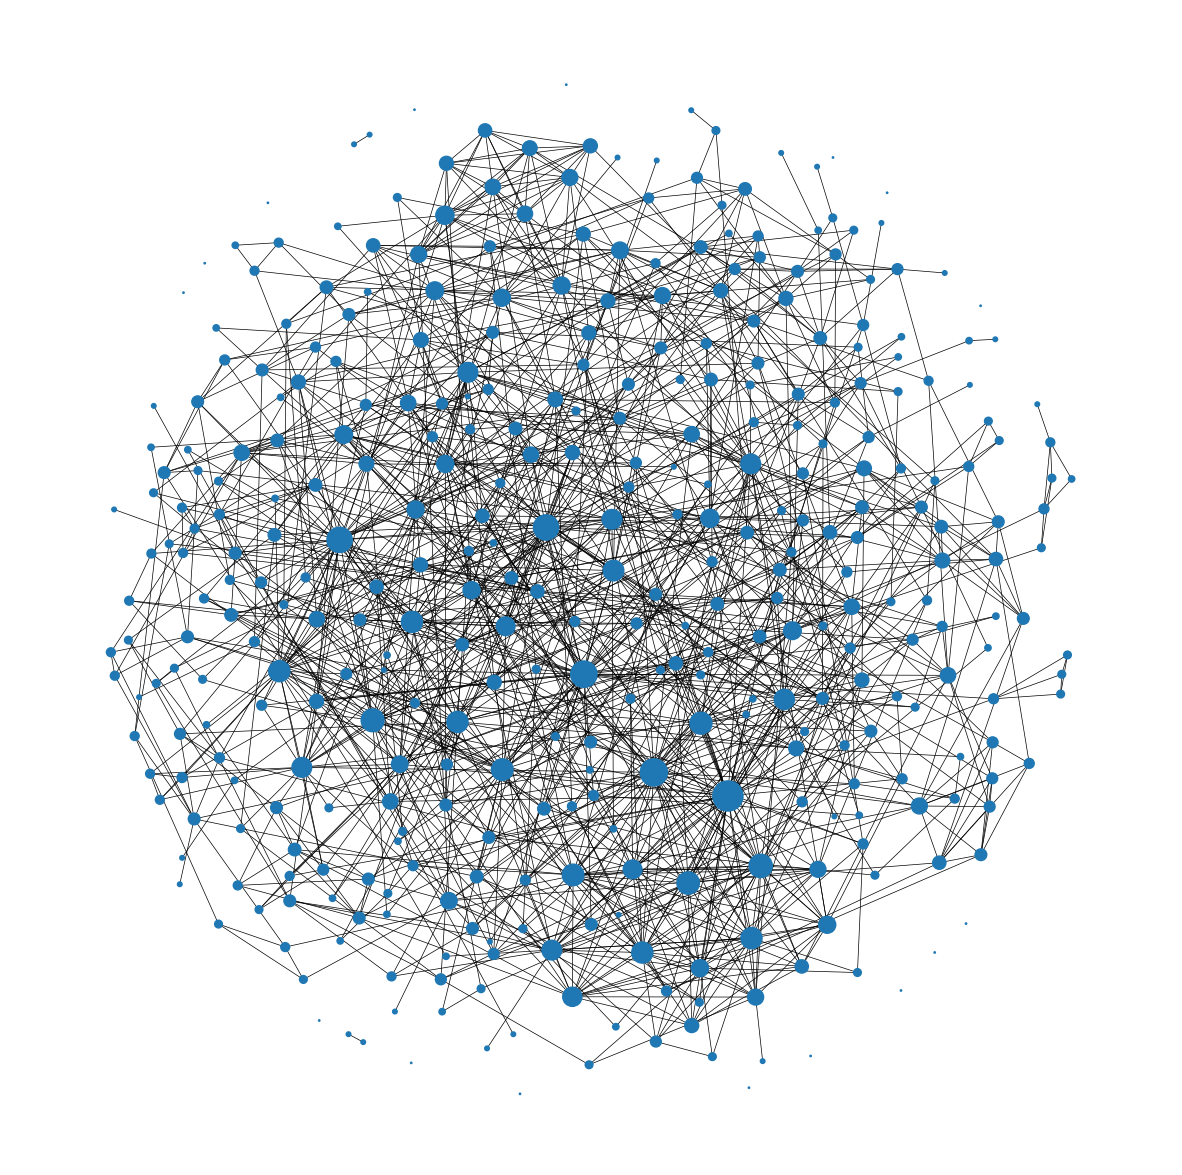

In [66]:
dataframe = pd.read_csv("transmission_network.csv", sep=";", index_col=0)
dataframe.columns = dataframe.index
# dataframe = dataframe.drop(columns=dataframe.columns[0])
# # print(dataframe)
# rename_dict = {}
# for old, new in zip(dataframe.columns, range(374)):
#     rename_dict[old] = new
# dataframe = dataframe.rename(columns=rename_dict)

graph = nx.from_pandas_adjacency(dataframe)
# plot_graph_spectral(graph)
# plot_graph_spring(graph)
plot_graph_forceatlas(graph)

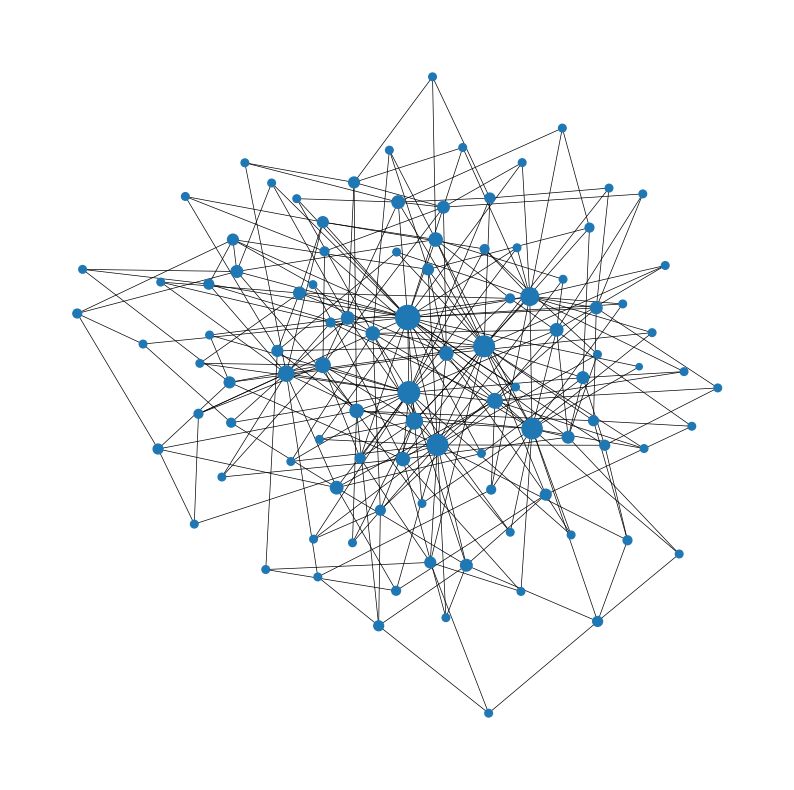

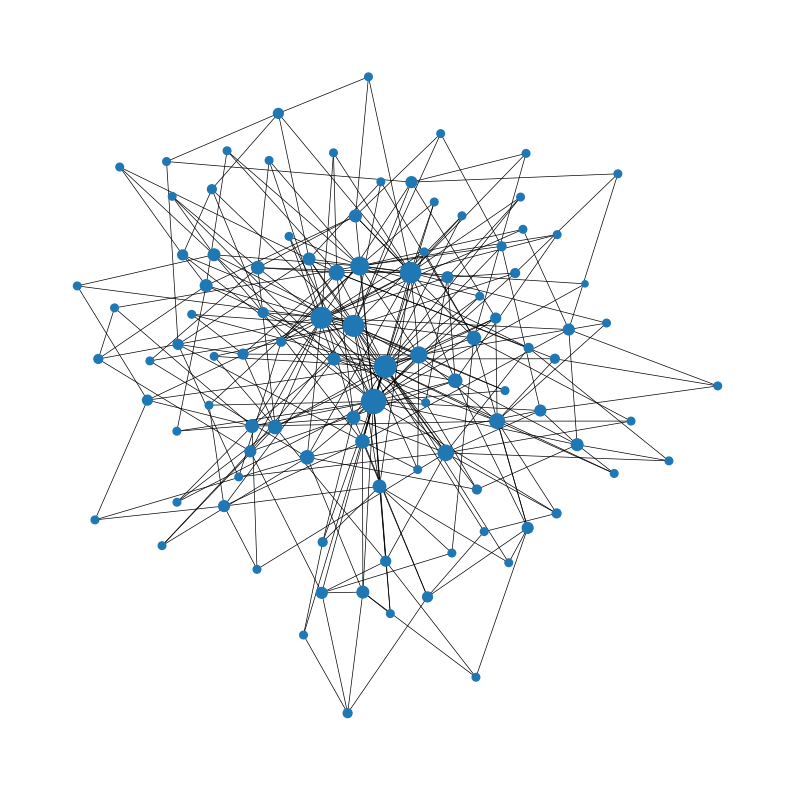

In [11]:
barabasiNet = nx.barabasi_albert_graph(100, 3)

plot_graph_spectral(barabasiNet)
plot_graph_spring(barabasiNet)

100


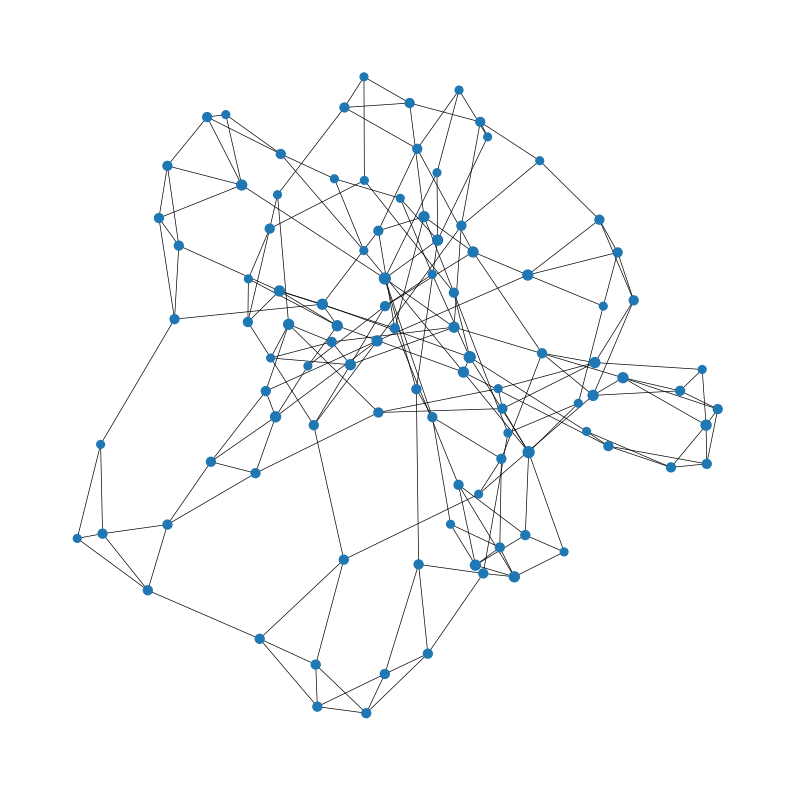

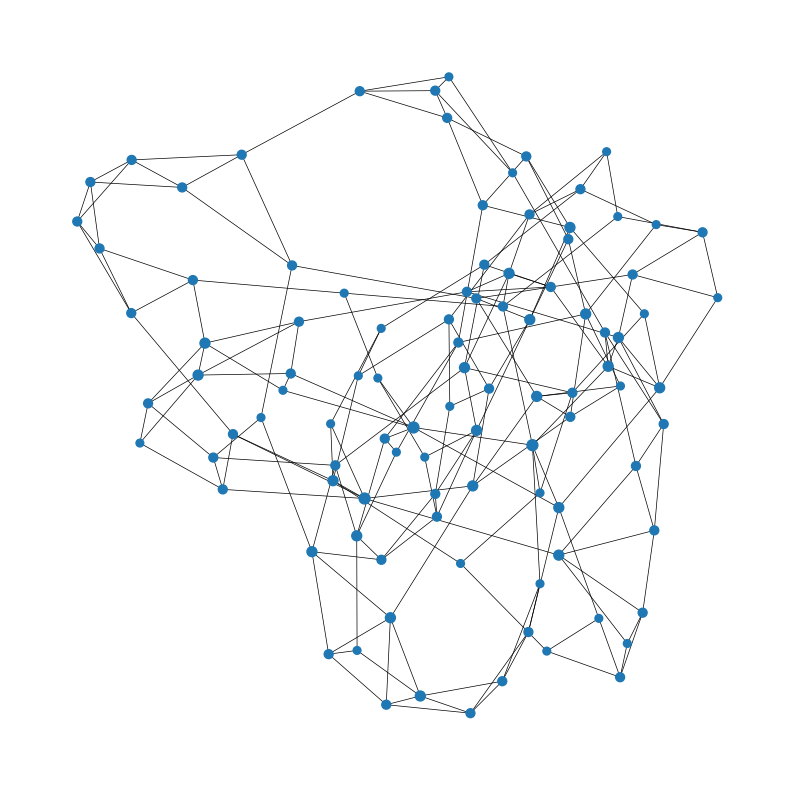

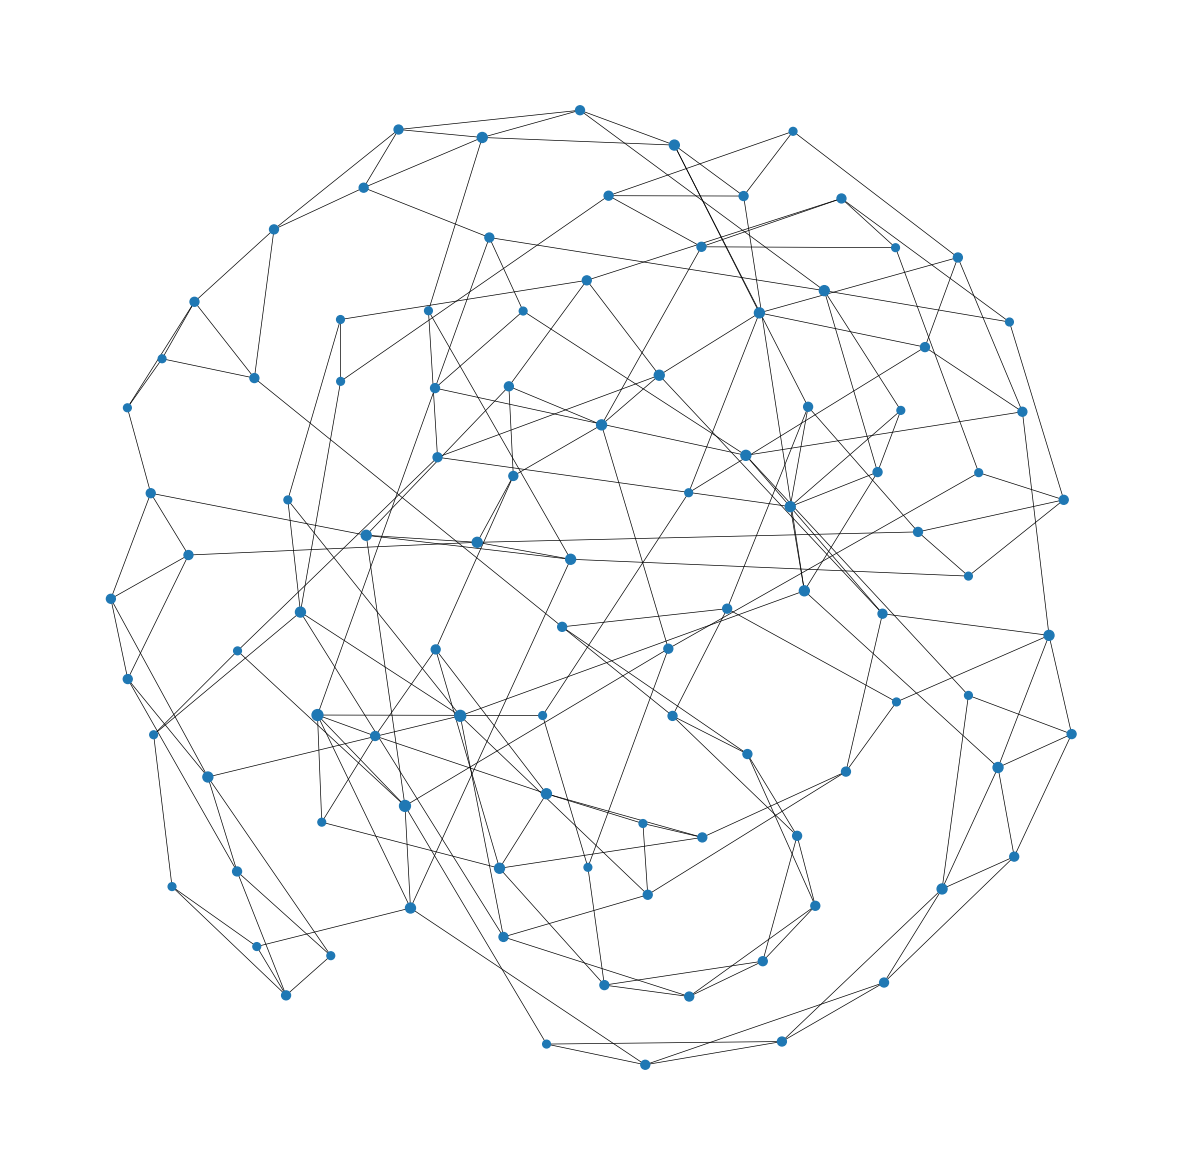

In [67]:
wattsStrogantz = nx.watts_strogatz_graph(100, 5, 0.2)
plot_graph_spectral(wattsStrogantz)
plot_graph_spring(wattsStrogantz)
plot_graph_forceatlas(wattsStrogantz)


100


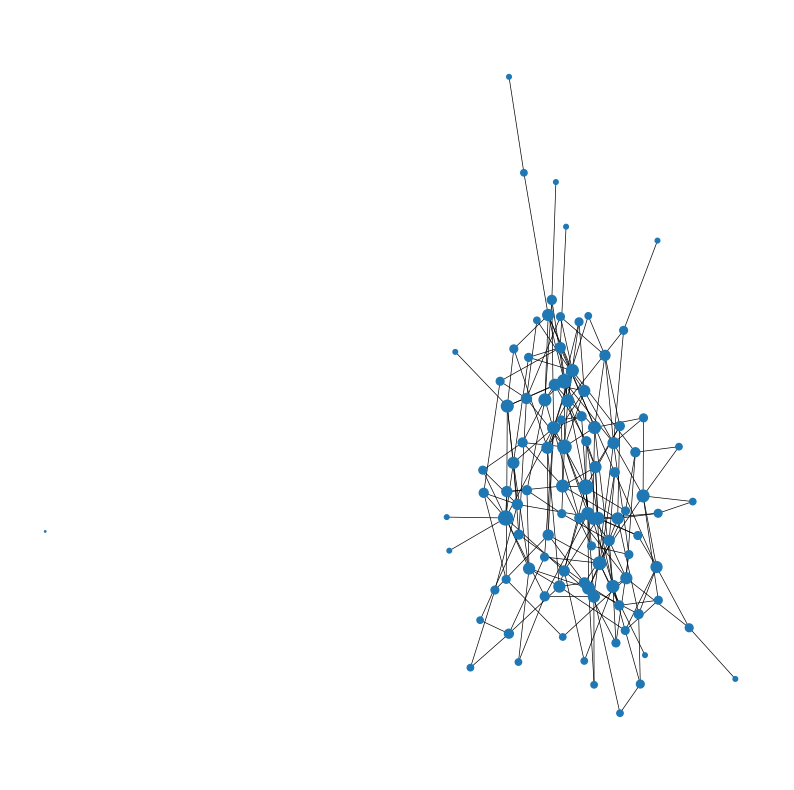

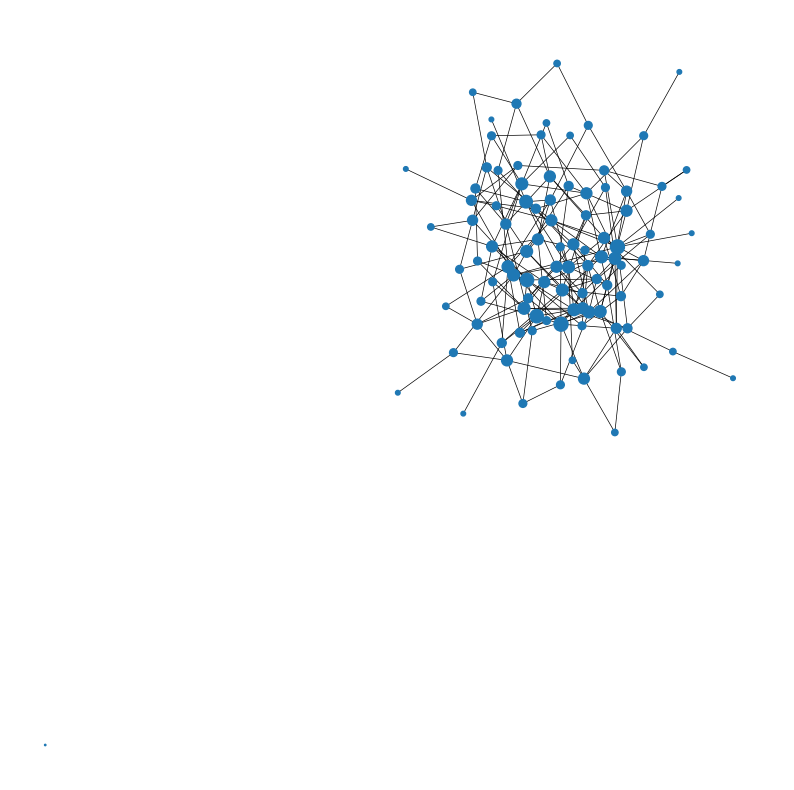

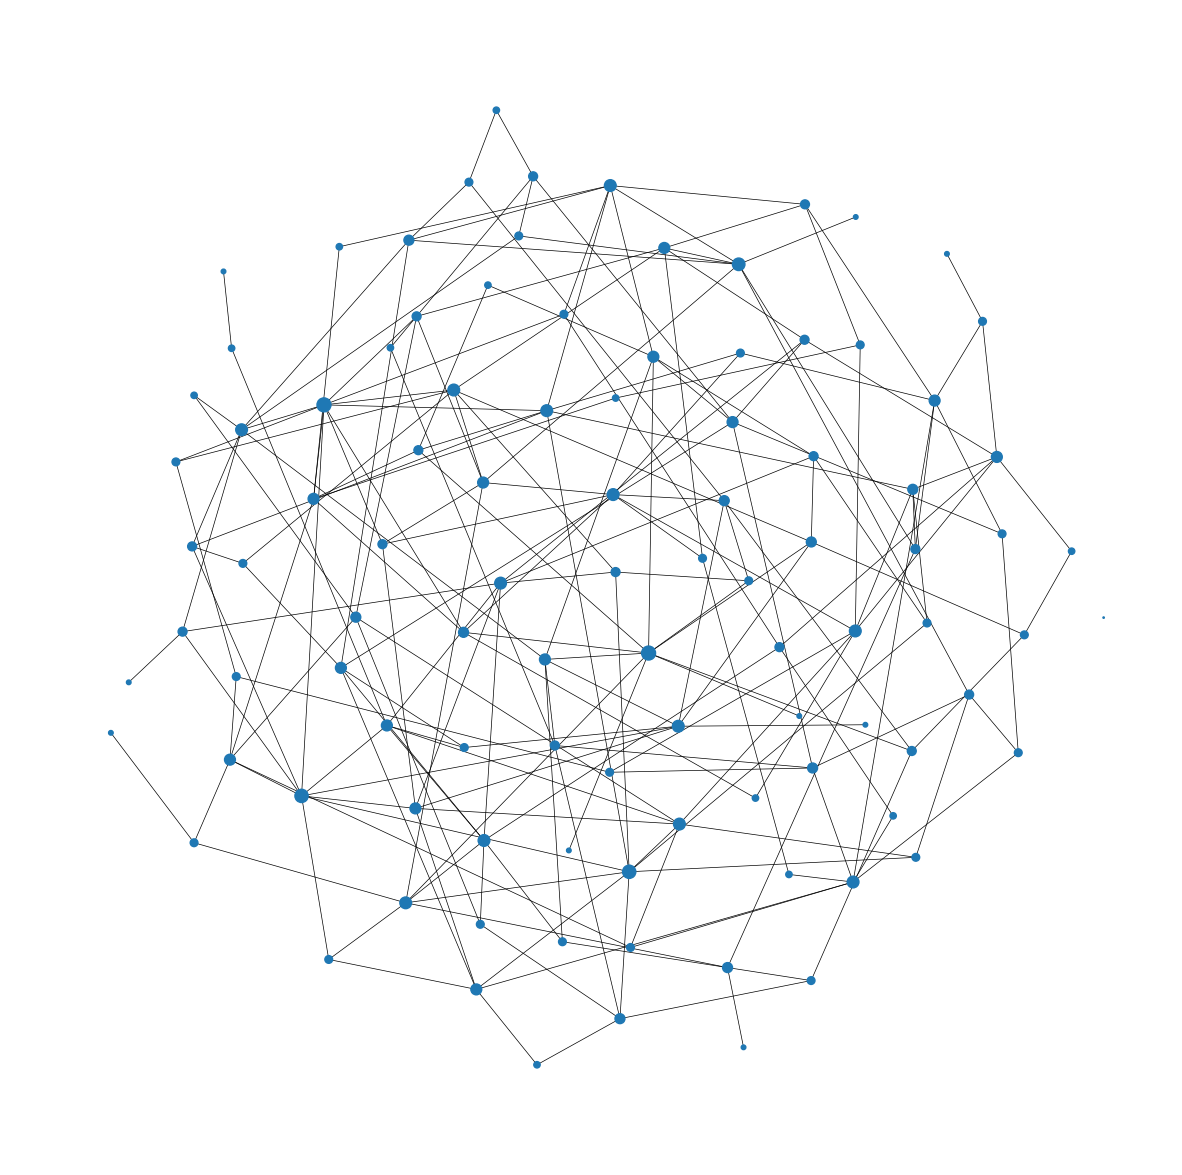

In [69]:
erdosReyni = nx.erdos_renyi_graph(100, 0.04)
plot_graph_spectral(erdosReyni)
plot_graph_spring(erdosReyni)
plot_graph_forceatlas(erdosReyni)